In [1]:
import pandas as pd
prices = pd.read_csv('prices.csv')
prices.head()

,pid,amount,timestamp
0,13,10380.02,1516704716
1,12,10384.72,1516704692
2,11,10364.61,1516704579
3,10,10364.61,1516704575
4,9,10364.61,1516704570


In [2]:
prices.corr()

,pid,amount,timestamp
pid,1.000000,-0.656743,0.964745
amount,-0.656743,1.000000,-0.755176
timestamp,0.964745,-0.755176,1.000000


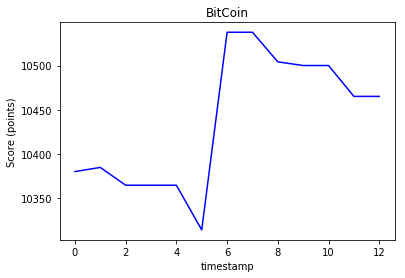

In [3]:
import matplotlib.pyplot as plt
plt.title("BitCoin")
plt.xlabel("timestamp")
plt.ylabel("Score (points)")
plt.plot(prices['amount'], 'b')
plt.show()

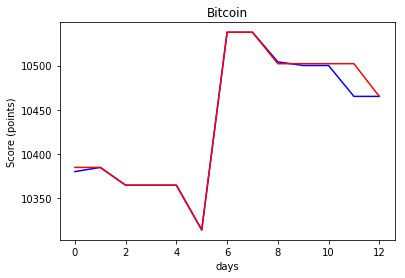

mae : 3.68307692308
mse : 107.905607692
mabse : 0.0


In [4]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

X = np.arange(len(prices)).reshape(-1, 1)
y = np.array(prices['amount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

y_predict = tree_reg.predict(X)
plt.title("Bitcoin")
plt.xlabel("days")
plt.ylabel("Score (points)")
plt.plot(prices['amount'], 'b')
plt.plot(y_predict, 'r')
plt.show()

print("mae :", mean_absolute_error(y, y_predict))
print("mse :", mean_squared_error(y, y_predict))
print("mabse :", median_absolute_error(y, y_predict))